# UCI Wine Quality Assessment
### Predicting quality of white wine given 11 physiochemical attributes
### Data - https://www.kaggle.com/c/uci-wine-quality-dataset/data

#### By Jagannath Banerjee | jagannath.banerjee@gmail.com | https://www.linkedin.com/in/jagannath-banerjee/

### Dataset Information

We have 2 datsets:

winequality-data.csv - Training data (all attributes, and corresponding quality) ; 3918 rows X 13 columns

winequality-solution-input.csv - Test data (attributes only) ; 980 rows X 13 columns

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### Objective
The goal is to predict the quality given those physicochemical attributes. Only the white wine dataset is used here.

### Data fields
#### Input/Feature variables (based on physicochemical tests): 

1.  fixed acidity 
2.  volatile acidity 
3.  citric acid 
4.  residual sugar 
5.  chlorides 
6.  free sulfur dioxide 
7.  total sulfur dioxide
8.  density 
9.  pH 
10. sulphates 
11. alcohol

#### Output/Target variable (based on sensory data): 

quality (score between 0 (very bad) and 10 (very excellent))

#### Other:

id (unique ID for each sample, needed for submission)

## Import Libraries

In [221]:
#Data Processing Libraries
import numpy as np
import pandas as pd
from scipy.stats import norm

#Data Vizuaization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics Library
import statsmodels.formula.api as sm
from scipy.stats import iqr

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train
from sklearn.model_selection import cross_val_score # Library to split datset into test and train

from sklearn.linear_model import LinearRegression # Multiple linear regression
from sklearn.preprocessing import PolynomialFeatures # Polynomial Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression
from sklearn.svm import SVR  #Support Vector Machines

#Model Evaluation
from sklearn.metrics import r2_score # Best possible score is 1
from sklearn.metrics import explained_variance_score # Best possible score is 1.0, lower values are worse.
from sklearn.metrics import mean_absolute_error # Best possible score is 0
from sklearn.metrics import mean_squared_error # Best possible score is 0
from sklearn.metrics import mean_squared_log_error # Best possible score is 0
from sklearn.metrics import median_absolute_error # Best possible score is 0

## Get Data

In [102]:
data_train = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Github_Portfolio\\Data Science and Machine Learning\\data\\winequality-data.csv')
data_test = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Github_Portfolio\\Data Science and Machine Learning\\data\\winequality-solution-input.csv')

## Performing Descriptive Statistics

### Taking first peek into the data structure

In [103]:
print('Train data Shape -->' , data_train.shape)
print('Test data Shape -->' , data_test.shape)

Train data Shape --> (3918, 13)
Test data Shape --> (980, 12)


Test data set has 1 column less which is the "quality" column that we have to predict based on the training datset

In [104]:
data_train.head() # Fetching top 5 rows

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [105]:
data_train = data_train.drop(axis=0, columns='id') # Dropped the "id" column (unique ID for each sample)
data_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5


### Assess Data Quality & Missing Values

In [163]:
# Assess missing values in Training dataset
print("Assess missing values in Training dataset")
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

Assess missing values in Training dataset
                      Total  Percent
quality                   0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total_sulfur_dioxide      0      0.0
free_sulfur_dioxide       0      0.0
chlorides                 0      0.0
residual_sugar            0      0.0
citric_acid               0      0.0
volatile_acidity          0      0.0
fixed_acidity             0      0.0


In [164]:
# Assess missing values in Test dataset
print("Assess missing values in Test dataset")
total = data_test.isnull().sum().sort_values(ascending=False)
percent = (data_test.isnull().sum()/data_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

Assess missing values in Test dataset
                      Total  Percent
id                        0      0.0
alcohol                   0      0.0
sulphates                 0      0.0
pH                        0      0.0
density                   0      0.0
total.sulfur.dioxide      0      0.0
free.sulfur.dioxide       0      0.0
chlorides                 0      0.0
residual.sugar            0      0.0
citric.acid               0      0.0
volatile.acidity          0      0.0
fixed.acidity             0      0.0


#### There is no missing data in any columns of train and test dataset!

### Univariate Analysis

In [165]:
data_train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000


#### Observations:

1. Counts are same of all column. So there is no missing data
2. Residual Sugar (5.1) , free_sulphur_dioxide (17.15) , total_sulfur_dioxide (42.98) have high standard deviation. A high standard deviation indicates that the data points are spread out over a wider range of values.
3. Residual Sugar (Min - 0.6 ; Max - 65.8)  , free_sulphur_dioxide(Min - 3 , Max - 289)  and total_sulphur_dioxide(Min - 9 , Max - 440). We will do a box plot for have a better view of these data

We will see the data distribution of each column in next section

### Data distribution for each fields

#### We will use histogram to check the data distribution

[]

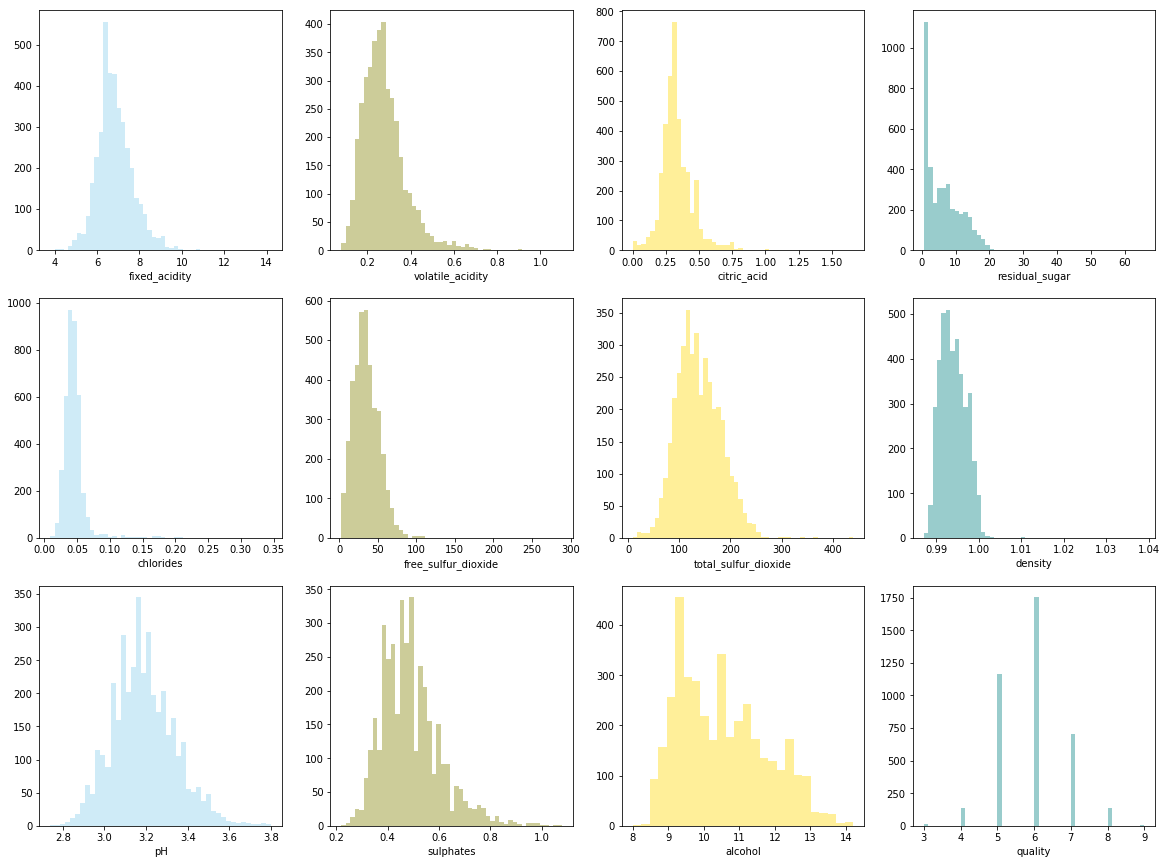

In [139]:
f, axes = plt.subplots(3, 4, figsize=(20, 15))
sns.distplot( data_train["fixed_acidity"] , kde=False, rug=False, color="skyblue", ax=axes[0, 0])
sns.distplot( data_train["volatile_acidity"] , kde=False, rug=False, color="olive", ax=axes[0, 1])
sns.distplot( data_train["citric_acid"] , kde=False, rug=False, color="gold", ax=axes[0, 2])
sns.distplot( data_train["residual_sugar"] , kde=False, rug=False, color="teal", ax=axes[0, 3])

sns.distplot( data_train["chlorides"] , kde=False, rug=False, color="skyblue", ax=axes[1, 0])
sns.distplot( data_train["free_sulfur_dioxide"] , kde=False, rug=False, color="olive", ax=axes[1, 1])
sns.distplot( data_train["total_sulfur_dioxide"] , kde=False, rug=False, color="gold", ax=axes[1, 2])
sns.distplot( data_train["density"] , kde=False, rug=False, color="teal", ax=axes[1, 3])

sns.distplot( data_train["pH"] , kde=False, rug=False, color="skyblue", ax=axes[2, 0])
sns.distplot( data_train["sulphates"] , kde=False, rug=False, color="olive", ax=axes[2, 1])
sns.distplot( data_train["alcohol"] , kde=False, rug=False, color="gold", ax=axes[2, 2])
sns.distplot( data_train["quality"] , kde=False, rug=False, color="teal", ax=axes[2, 3])
plt.plot()

#### We will measure the Skewness and Kurtosis along with the above distribution to learn about the data

In [168]:
# Skewness & Kurtosis
columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH', 'sulphates','alcohol','quality']
skew_train = []
kutosis_train = []
for column in columns:
    skew_train.append(data_train[column].skew())
    kutosis_train.append(data_train[column].kurt())
skew_kurt_df = pd.DataFrame({'Columns':columns,'Skewness':skew_train,'Kutosis':kutosis_train})
print(skew_kurt_df)

                 Columns    Kutosis  Skewness
0          fixed_acidity   2.494729  0.685694
1       volatile_acidity   4.999094  1.538732
2            citric_acid   7.140382  1.365760
3         residual_sugar   4.334142  1.158705
4              chlorides  36.591549  4.885545
5    free_sulfur_dioxide  13.425080  1.530647
6   total_sulfur_dioxide   0.693781  0.427554
7                density  11.834566  1.124505
8                     pH   0.479497  0.452952
9              sulphates   1.591707  0.979992
10               alcohol  -0.686468  0.495043
11               quality   0.236104  0.150713


#### Observations from Histogram and Skew/Kurtosis Table above:
1. fixed_acidity - Approximately normal distribution ; Sharp Peak ; High Kurtosis ; Chances of having outliers
2. volatile_acidity - Approximately normal distribution ; Sharp Peak ; High Kurtosis ; Positive Skewed; Chances of having outliers
3. citric_acid - Approximately normal distribution ; Sharp Peak ; High Kurtosis ; Chances of having outliers
4. residual_sugar - Does not follow normal distribution ; Positive Skewed
5. chlorides - Does not follow normal distribution; Positive Skewed
6. free_sulfur_dioxide - Does not follow normal distribution ; Positive Skewed
7. total_sulfur_dioxide - Normal distribution 
8. density - Does not follow normal distribution ; High Kutosis ; Chances of having outliers
9. pH- Normal distribution
10. sulphates- Approximately normal distribution
11. alcohol - Irregular shape
12. quality - Normal distribution.Most values are concentrated across between 5 to 7. Few lies between 3 & 4 and 8 & 9.

### Box Plot on the columns to check for outliers

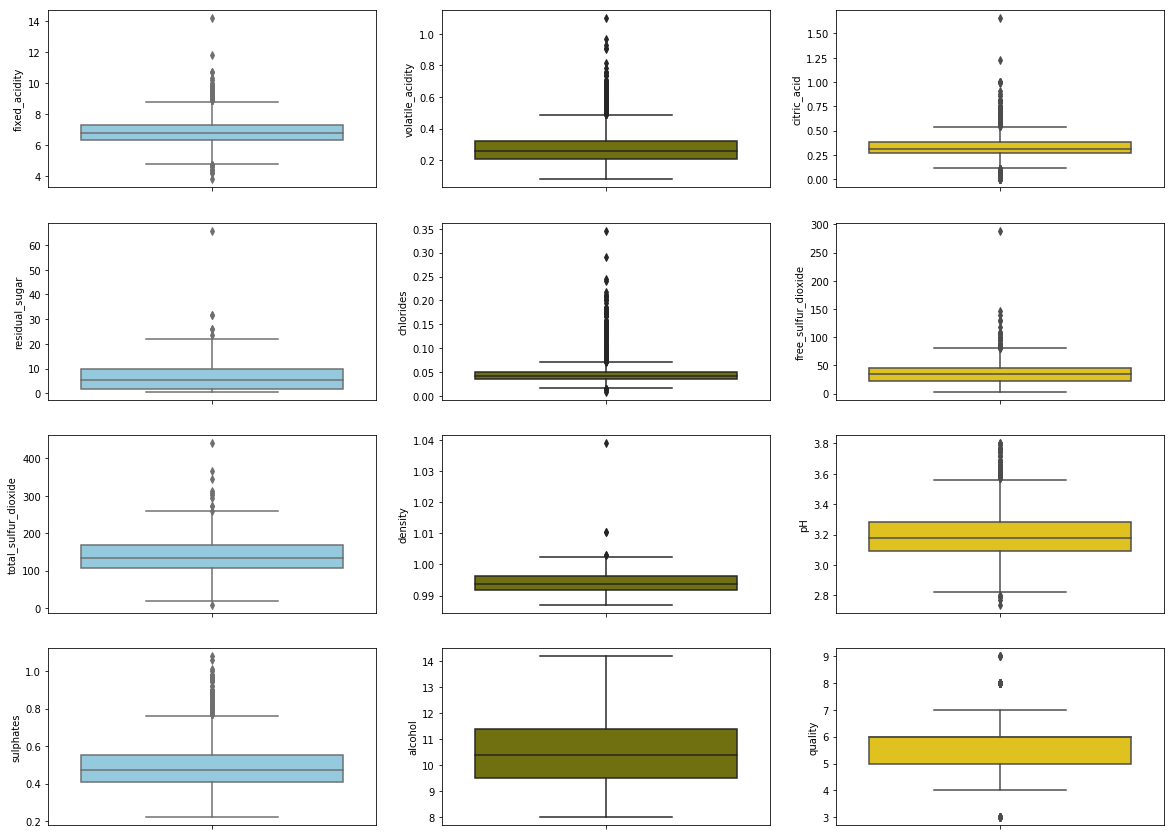

In [154]:
f, axes = plt.subplots(4, 3 , figsize=(20, 15))
sns.boxplot(x=data_train["fixed_acidity"], orient="v", color="skyblue",ax=axes[0, 0])
sns.boxplot(x=data_train["volatile_acidity"], orient="v", color="olive",ax=axes[0, 1])
sns.boxplot(x=data_train["citric_acid"] , orient="v", color="gold",ax=axes[0, 2],)
sns.boxplot(x=data_train["residual_sugar"] , orient="v", color="skyblue",ax=axes[1, 0])
sns.boxplot(x=data_train["chlorides"] , orient="v", color="olive",ax=axes[1, 1])
sns.boxplot(x=data_train["free_sulfur_dioxide"] , orient="v", color="gold",ax=axes[1, 2])
sns.boxplot(x=data_train["total_sulfur_dioxide"] , orient="v", color="skyblue",ax=axes[2, 0])
sns.boxplot(x=data_train["density"] , orient="v", color="olive",ax=axes[2, 1])
sns.boxplot(x=data_train["pH"] , orient="v", color="gold",ax=axes[2, 2])
sns.boxplot(x=data_train["sulphates"] , orient="v", color="skyblue",ax=axes[3, 0])
sns.boxplot(x=data_train["alcohol"] , orient="v", color="olive",ax=axes[3, 1])
sns.boxplot(x=data_train["quality"] , orient="v", color="gold",ax=axes[3, 2])
plt.show()

#### Outlier - an outlier is a data point that significantly differs from the other data points in a sample. Outlier is calculated using the following way :
Calculate first quartile (Q1), third quartile (Q3) and the interquartile range (IQR=Q3-Q1)
Lower bound - Q1 – (1.5 × IQR)
Upper Bound - Q3 + (1.5 × IQR)
Anything outside this range is an outlier.

Visually looking at the box plots of the columns:
1. fixed_acidity - Lot of outliers
2. volatile_acidity - Lot of outliers
3. citric_acid - Lot of outliers
4. residual_sugar - Few outliers
5. chlorides - Lot of outliers
6. free_sulfur_dioxide - Few outliers
7. total_sulfur_dioxide - Few outliers
8. density - Few outliers
9. pH - Few outliers
10. sulphates- Few outliers
11. alcohol - No Outliers although the distribution was irregularly shaped

#### We will measure the Interquartile range and outlier range from the above box plot


In [255]:
# IQR  and Outlier Boundary Calculation
#Defining the list
IQR = [] ; PER_25 = [] ;PER_75 = [] ;OUTL_HIGH = [] ;OUTL_LOW = [] ; OUTL_COUNT = []

#Getting the columns from the training dataset
columns = list(data_train.columns)

#Finding the column details.
for column in columns:
    PER_25.append(data_train[column].quantile(0.25))
    PER_75.append(data_train[column].quantile(0.75))
    IQR.append(round(iqr(data_train[column], axis=0),2))
    
    lower_bound = (data_train[column].quantile(0.25) - (1.5*iqr(data_train[column])))
    upper_bound = (data_train[column].quantile(0.75) + (1.5*iqr(data_train[column])))
    OUTL_LOW.append(lower_bound)
    OUTL_HIGH.append(upper_bound)
    
    outlier_low = (data_train[column] < lower_bound )
    outlier_upper = (data_train[column] > upper_bound)
    OUTL_COUNT.append(len(data_train[outlier_low]) + len(data_train[outlier_upper]))

#Putting the list into Pandas DataFrame
quar_range_df = pd.DataFrame({'Columns':columns, 'IQR':IQR,'Outlier Low':OUTL_LOW,'Outlier High':OUTL_HIGH,'OUTL_COUNT':OUTL_COUNT})
#Re-arranging the columns
quar_range_df = quar_range_df[['Columns','IQR', 'Outlier Low', 'Outlier High','OUTL_COUNT']]
print(quar_range_df)

                 Columns    IQR  Outlier Low  Outlier High  OUTL_COUNT
0          fixed_acidity   1.00      4.80000       8.80000          94
1       volatile_acidity   0.11      0.04500       0.48500         141
2            citric_acid   0.11      0.10500       0.54500         263
3         residual_sugar   8.20    -10.60000      22.20000           6
4              chlorides   0.01      0.01500       0.07100         166
5    free_sulfur_dioxide  23.00    -11.50000      80.50000          40
6   total_sulfur_dioxide  60.75     16.12500     259.12500          11
7                density   0.00      0.98501       1.00285           5
8                     pH   0.19      2.80500       3.56500          51
9              sulphates   0.14      0.20000       0.76000         101
10               alcohol   1.90      6.65000      14.25000           0
11               quality   1.00      3.50000       7.50000         162


### Bi-Variate Analysis by vizualizing the data by computing pairwise correlation of columns

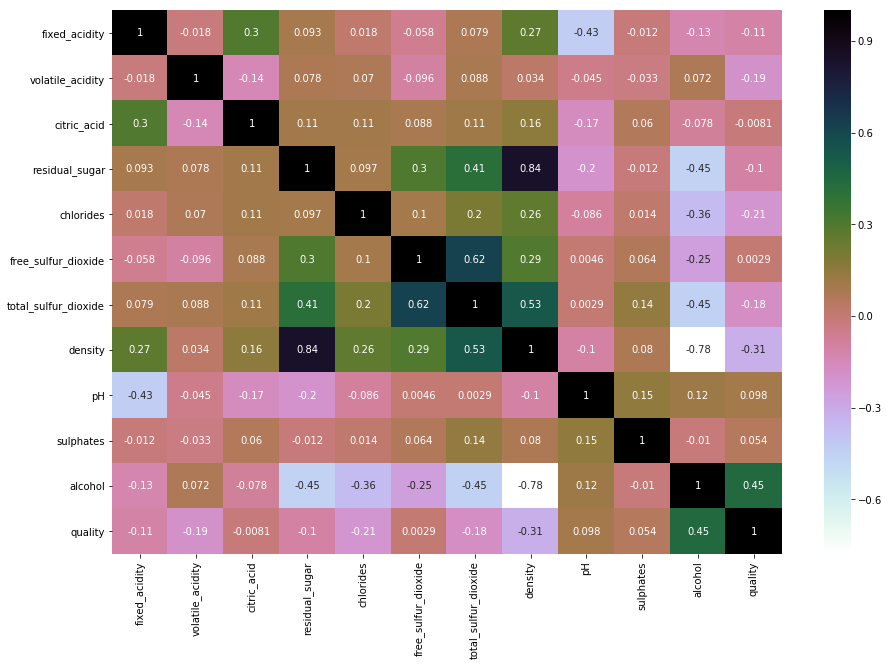

In [197]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data_train.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### Scatter Plot to see the relationsip between the variables. We will use seaborn pairplot

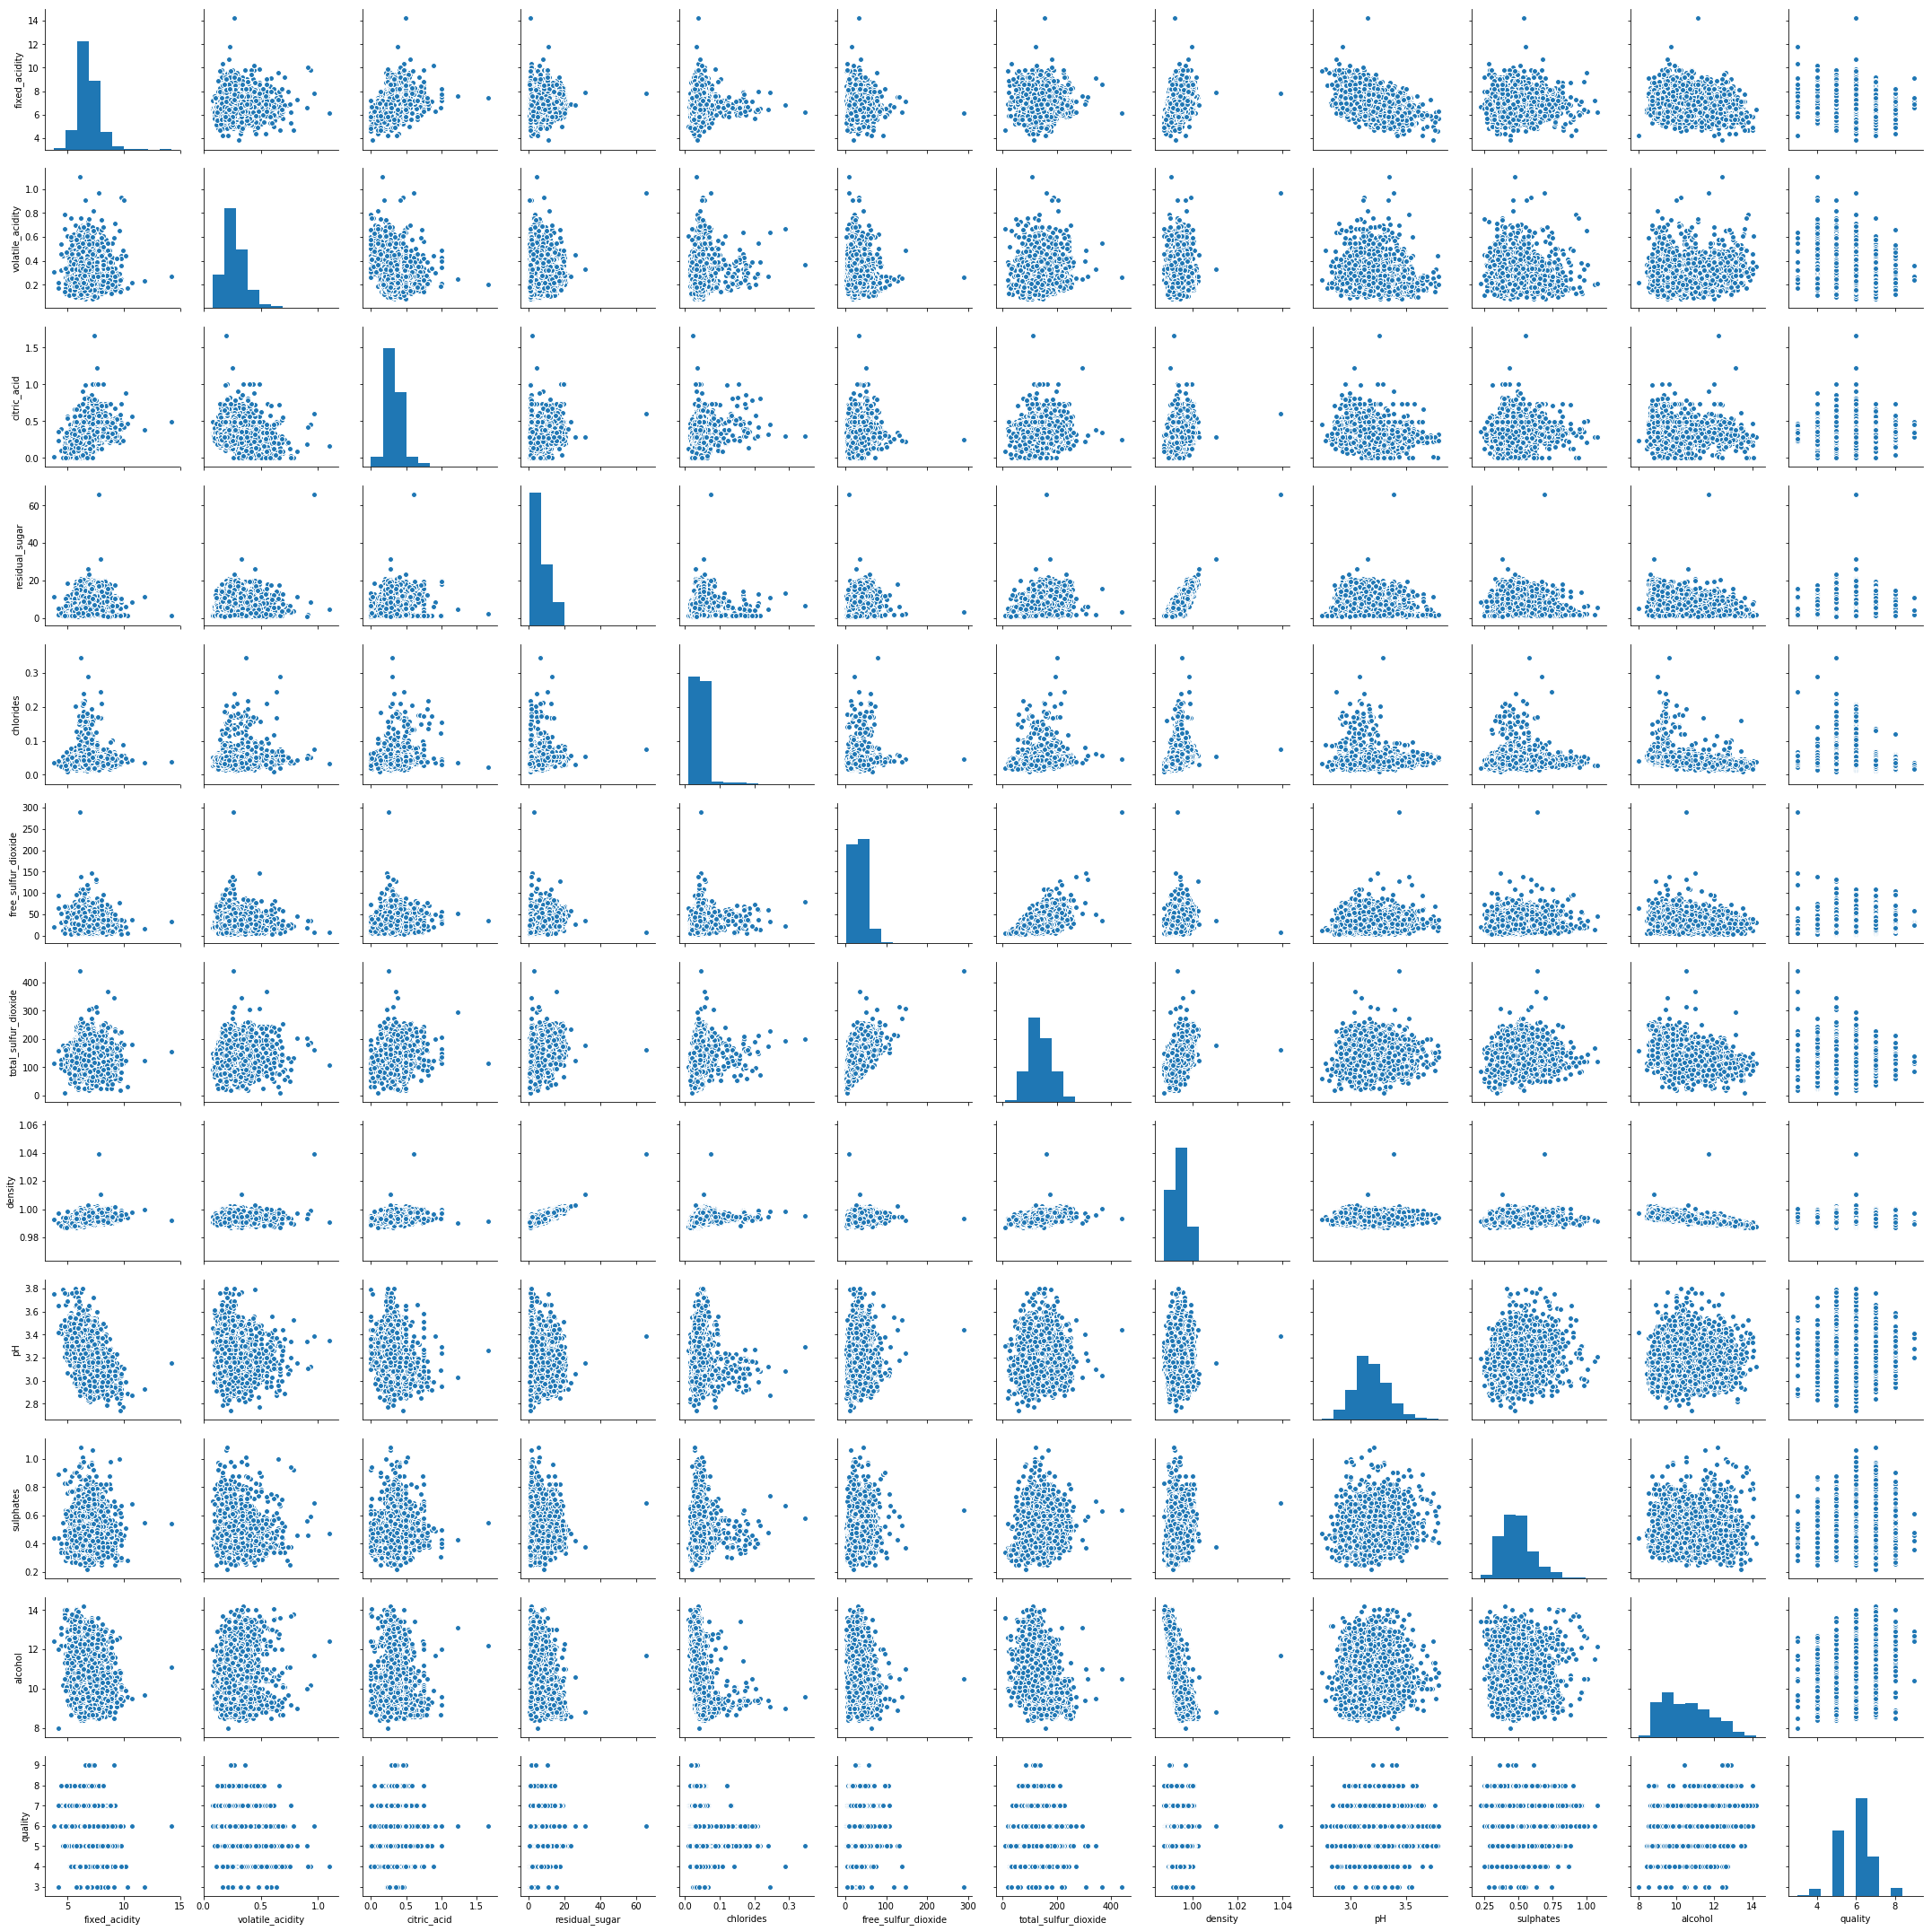

In [196]:
#scatterplot
columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH', 'sulphates','alcohol','quality']
sns.pairplot(data_train[columns])
plt.show();

### Observation
Looking at the last column, It does not look like wine quality is well supported by its chemical properties. At each quality level variability of the predictors is high and the groups are not well separated.

### Getting columns into X (feature variable) and y(target variable)¶

In [238]:
#Assign Feature and Target Variable
X_feature = data_train.iloc[:,0:11].values
y_target = data_train.iloc[:,11].values

### Dividing the dataset into test & train
#### test_size=0.30 will slice the data in such a way that 30 % of data will be copied to the test variable and 70 % to train variable

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target,test_size=0.30)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 2742 samples in the training set and 1176 samples in the test set


### Next we will call the regressor, fit the model and predict the outcome

In [198]:
# Calling the regression function. We will use multiple linear regression

regression_model = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
regressor_model_list= []
regressor_accuracy_test = []
regressor_accuracy_train = []
regressor_accuracy_average = []
k_fold_cv_score = []
k_fold_cv_std = []

for regressor_list in regression_model:
    regressor = regressor_list
    
    # Fitting the training set into regression model
    regressor.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = regressor.predict(X_test) 
    score_test = r2_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = regressor.predict(X_train) 
    score_train = r2_score(y_train, y_pred_train)

    #Keeping the model and accuracy score into a list
    regressor_model_list.append(regressor_list.__class__.__name__)
    regressor_accuracy_test.append(round(score_test,4))
    regressor_accuracy_train.append(round(score_train,4))
    regressor_accuracy_average.append((score_test + score_train)/2)
    
    # Applying k-fold cross validation
    score = cross_val_score(estimator = regressor , X=X_feature, y=y_target , cv=10 )
    
    #The mean score and the 95% confidence interval of the score estimate :
    k_fold_cv_score.append(score.mean())
    k_fold_cv_std.append(score.std())
    
#Creating pandas dataframe with Model and corresponding accuracy
accuracy_df = pd.DataFrame({'Model':regressor_model_list , 'Test Accuracy':regressor_accuracy_test, 'Train Accuracy' :regressor_accuracy_train , 'Average_Accuracy' :regressor_accuracy_average},index=None)
k_fold_cv_df = pd.DataFrame({'Model':regressor_model_list, 'k-fold CV':k_fold_cv_score , 'std_dev':k_fold_cv_std},index=None)
        
# Sorting the data with highest accuracy in the top
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True)

# Arranging the dataframe columns
accuracy_df = accuracy_df[['Model', 'Test Accuracy', 'Train Accuracy', 'Average_Accuracy']]
print("R2 Score for each model")
print("*" * 30)
print(accuracy_df )

print("\nK Fold cross validation score")
print("*" * 30)
print(k_fold_cv_df)

R2 Score for each model
******************************
                   Model  Test Accuracy  Train Accuracy  Average_Accuracy
3  RandomForestRegressor         0.4195          0.8968          0.658132
1                    SVR         0.2337          0.7800          0.506874
2  DecisionTreeRegressor        -0.0175          1.0000          0.491236
0       LinearRegression         0.2739          0.2956          0.284757

K Fold cross validation score
******************************
                   Model  k-fold CV   std_dev
0       LinearRegression   0.282629  0.039849
1                    SVR   0.290587  0.040687
2  DecisionTreeRegressor   0.059767  0.114331
3  RandomForestRegressor   0.467403  0.029804


### Building the optimal model using back Propagation
#### We will use back propagation method to evaluate significance of the columns to the outcome . We will significance level as 0.05 and will remove the feature columns that has p-value > 0.05 (significance level)

This will be performed with the help of stats model library. Don't forget to import ( import statsmodel.formula.api as sm)
In multiple linear equation, y=b0x0 + b1x1 + b2x2+.....+bnxn ; x0 is not present in out test dataset. We will add a column x0 as 1 in front of all the rows.

In [241]:
# Select Significant level (SL) to stay in the model 0.05 . Consider predictor with highest p-value. 
# If p-value > 0.05,remove the predictor and fit the model without this varible
# Repeat the steps until you get optimum model
# Lower the p-value, the more significant will be the idependant variable with respect to the dependant variable.

import statsmodels.api as sm
#X_feature = sm.add_constant(X_feature) # This will add the constant variable in the front
X_opt = X_feature[:,[0,1,2,3,4,5,6,7,8,9,10,11]] # These are the column indexes
print(X_feature.shape)

model = sm.OLS(y_target,X_opt)
result = model.fit()
result.summary()

(3918, 12)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     147.0
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          7.38e-284
Time:                        05:21:50   Log-Likelihood:                -4425.3
No. Observations:                3918   AIC:                             8875.
Df Residuals:                    3906   BIC:                             8950.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.6500     20.277      6.887      0.000      99.896     179.404
x1             0.0621      0.023      2.704      0.007       0.017       0.107
x2            -1.8962      0.128    -14.854      0.000      -2.146      -1.646
x3             0.0314      0.107      0.294      0.769      -0.178       0.240
x4             0.0794      0.008      9.674      0.000       0.063       0.096
x5            -0.2643      0.630     -0.420      0.675      -1.499       0.970
x6             0.0034      0.001      3.619      0.000       0.002       0.005
x7            -0.0002      0.000     -0.510      0.610      -0.001       0.001
x8          -139.7410     20.568     -6.794      0.000    -180.066     -99.416
x9             0.6349      0.117      5.447      0.000       0.406       0.863
x10            0.5857      0.112      5.237      0.000       0.366       0.805
x11            0.2212      0.026      8.432      0.000       0.170       0.273
==============================================================================
Omnibus:                       91.240   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.522
Skew:                           0.064   Prob(JB):                     1.74e-44
Kurtosis:                       4.104   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [242]:
#Next we look at the P>|t| column. We will remove the column that has highest value in that column. Looking at the above table x3 has highest P-value
# x3 originally is "citric acid". Next we will remove "citric acid" and test
X_opt = X_feature[:,[0,1,2,4,5,6,7,8,9,10,11]] # These are the column indexes
model = sm.OLS(y_target,X_opt)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     161.7
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          5.91e-285
Time:                        05:23:56   Log-Likelihood:                -4425.3
No. Observations:                3918   AIC:                             8873.
Df Residuals:                    3907   BIC:                             8942.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.2798     20.235      6.883      0.000      99.607     178.953
x1             0.0630      0.023      2.772      0.006       0.018       0.108
x2            -1.9025      0.126    -15.115      0.000      -2.149      -1.656
x3             0.0793      0.008      9.671      0.000       0.063       0.095
x4            -0.2445      0.626     -0.391      0.696      -1.472       0.983
x5             0.0034      0.001      3.632      0.000       0.002       0.005
x6            -0.0002      0.000     -0.501      0.617      -0.001       0.001
x7          -139.3641     20.526     -6.790      0.000    -179.606     -99.122
x8             0.6323      0.116      5.441      0.000       0.404       0.860
x9             0.5869      0.112      5.253      0.000       0.368       0.806
x10            0.2219      0.026      8.495      0.000       0.171       0.273
==============================================================================
Omnibus:                       91.031   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.895
Skew:                           0.064   Prob(JB):                     2.38e-44
Kurtosis:                       4.102   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [243]:
#Next we look at the P>|t| column. We will remove the column that has highest value in that column. Looking at the above table x4 has highest P-value
# x4 originally is "residual_sugar". Next we will remove "residual_sugar" and test
X_opt = X_feature[:,[0,1,2,5,6,7,8,9,10,11]] # These are the column indexes. Removed 3-citric acid and 4-residual sugar
model = sm.OLS(y_target,X_opt)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     165.4
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          4.12e-266
Time:                        05:32:56   Log-Likelihood:                -4471.7
No. Observations:                3918   AIC:                             8963.
Df Residuals:                    3908   BIC:                             9026.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.0883      7.150     -6.166      0.000     -58.107     -30.070
x1            -0.0845      0.017     -4.950      0.000      -0.118      -0.051
x2            -1.9667      0.127    -15.466      0.000      -2.216      -1.717
x3            -1.4216      0.621     -2.288      0.022      -2.640      -0.203
x4             0.0051      0.001      5.417      0.000       0.003       0.007
x5            -0.0007      0.000     -1.731      0.083      -0.002    9.67e-05
x6            47.0330      7.140      6.587      0.000      33.034      61.032
x7            -0.0638      0.092     -0.691      0.490      -0.245       0.117
x8             0.3089      0.109      2.828      0.005       0.095       0.523
x9             0.4162      0.017     24.650      0.000       0.383       0.449
==============================================================================
Omnibus:                       93.756   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.237
Skew:                           0.052   Prob(JB):                     8.19e-47
Kurtosis:                       4.135   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [244]:
# x7 which corresponds to column 9 (pH) will be removed
X_opt = X_feature[:,[0,1,2,5,6,7,8,10,11]] # These are the column indexes. Removed 3-citric acid and 4-residual sugar
model = sm.OLS(y_target,X_opt)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     186.0
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          3.71e-267
Time:                        05:39:26   Log-Likelihood:                -4471.9
No. Observations:                3918   AIC:                             8962.
Df Residuals:                    3909   BIC:                             9018.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.8355      7.140     -6.139      0.000     -57.835     -29.836
x1            -0.0792      0.015     -5.180      0.000      -0.109      -0.049
x2            -1.9588      0.127    -15.467      0.000      -2.207      -1.710
x3            -1.3972      0.620     -2.253      0.024      -2.613      -0.181
x4             0.0051      0.001      5.490      0.000       0.003       0.007
x5            -0.0008      0.000     -1.792      0.073      -0.002    7.07e-05
x6            46.5572      7.106      6.551      0.000      32.624      60.490
x7             0.2984      0.108      2.759      0.006       0.086       0.510
x8             0.4147      0.017     24.767      0.000       0.382       0.448
==============================================================================
Omnibus:                       94.560   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.480
Skew:                           0.049   Prob(JB):                     1.62e-47
Kurtosis:                       4.145   Cond. No.                     1.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
# x5 > 0.05 ; x5 corresponds to total_sulfur_dioxide column which will be removed
X_opt = X_feature[:,[0,1,2,5,6,8,10,11]] # These are the column indexes. Removed 3-citric acid and 4-residual sugar
model = sm.OLS(y_target,X_opt)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     212.0
Date:                Thu, 09 Aug 2018   Prob (F-statistic):          1.22e-267
Time:                        05:42:11   Log-Likelihood:                -4473.5
No. Observations:                3918   AIC:                             8963.
Df Residuals:                    3910   BIC:                             9013.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.0442      6.970     -5.888      0.000     -54.710     -27.378
x1            -0.0803      0.015     -5.250      0.000      -0.110      -0.050
x2            -2.0038      0.124    -16.139      0.000      -2.247      -1.760
x3            -1.4294      0.620     -2.305      0.021      -2.645      -0.213
x4             0.0041      0.001      5.492      0.000       0.003       0.006
x5            43.6833      6.925      6.308      0.000      30.106      57.261
x6             0.2723      0.107      2.539      0.011       0.062       0.482
x7             0.4176      0.017     25.044      0.000       0.385       0.450
==============================================================================
Omnibus:                       92.970   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.491
Skew:                           0.052   Prob(JB):                     3.23e-46
Kurtosis:                       4.128   Cond. No.                     3.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Based on the backward elemination technique, columns with most statistical significance cam out to be 
fixed_acidity, volatile_acidity, chlorides, free_sulfur_dioxide, density, sulphates and alcohol



#### Creating the feature and target variable with the the significant columns

In [251]:
#Assign Feature and Target Variable
X_feature_new = data_train[['fixed_acidity', 'volatile_acidity','chlorides', 'free_sulfur_dioxide', 'density', 'sulphates','alcohol']].values
y_target_new = data_train.iloc[:,11].values

[6 7 5 ... 5 7 5]


#### Splitting the data into test and train

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X_feature_new, y_target_new,test_size=0.50)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 1959 samples in the training set and 1959 samples in the test set


#### Running all regression models

In [258]:
# Calling the regression function. We will use multiple linear regression

regression_model = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
regressor_model_list= []
regressor_accuracy_test = []
regressor_accuracy_train = []
regressor_accuracy_average = []
k_fold_cv_score = []
k_fold_cv_std = []

for regressor_list in regression_model:
    regressor = regressor_list
    
    # Fitting the training set into regression model
    regressor.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = regressor.predict(X_test) 
    score_test = r2_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = regressor.predict(X_train) 
    score_train = r2_score(y_train, y_pred_train)

    #Keeping the model and accuracy score into a list
    regressor_model_list.append(regressor_list.__class__.__name__)
    regressor_accuracy_test.append(round(score_test,4))
    regressor_accuracy_train.append(round(score_train,4))
    regressor_accuracy_average.append((score_test + score_train)/2)
    
    # Applying k-fold cross validation
    score = cross_val_score(estimator = regressor , X=X_feature_new, y=y_target_new , cv=10 )
    
    #The mean score and the 95% confidence interval of the score estimate :
    k_fold_cv_score.append(score.mean())
    k_fold_cv_std.append(score.std())
    
#Creating pandas dataframe with Model and corresponding accuracy
accuracy_df = pd.DataFrame({'Model':regressor_model_list , 'Test Accuracy':regressor_accuracy_test, 'Train Accuracy' :regressor_accuracy_train , 'Average_Accuracy' :regressor_accuracy_average},index=None)
k_fold_cv_df = pd.DataFrame({'Model':regressor_model_list, 'k-fold CV':k_fold_cv_score , 'std_dev':k_fold_cv_std},index=None)
        
# Sorting the data with highest accuracy in the top
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True)

# Arranging the dataframe columns
accuracy_df = accuracy_df[['Model', 'Test Accuracy', 'Train Accuracy', 'Average_Accuracy']]
print("R2 Score for each model")
print("*" * 30)
print(accuracy_df )

print("\nK Fold cross validation score")
print("*" * 30)
print(k_fold_cv_df)

R2 Score for each model
******************************
                   Model  Test Accuracy  Train Accuracy  Average_Accuracy
3  RandomForestRegressor         0.3625          0.8862          0.624346
2  DecisionTreeRegressor        -0.0950          1.0000          0.452509
1                    SVR         0.2326          0.3680          0.300295
0       LinearRegression         0.2738          0.2726          0.273199

K Fold cross validation score
******************************
                   Model  k-fold CV   std_dev
0       LinearRegression   0.270412  0.036333
1                    SVR   0.257589  0.043052
2  DecisionTreeRegressor   0.043550  0.092419
3  RandomForestRegressor   0.427749  0.028048


## Conclusion

1. Random Forest Regressor performed better than other models with accuracy of 55%. Accuracy = (0.36 (test) + 0.88 (train) + 0.42 (k-fold cv) )/3 = 55%.
2. It seems evident that the wine quality is  not well supported by its chemical properties. We can still predict the data with 55% accuracy.
